### Quality Control
1. select data only on Jan. and July.
2. no-data should be eliminated, and missing days has to be less than 10, and consecutive missing days less than 5
3. select KZ, from 1980 to 1990, all 11 years data are passed quality control.
4. map these data as red dots

##### In the GHCN data, missing column means the missing days within that month, easy understand as consective missing day.

In [1]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd

In [2]:
ghcn = pd.read_csv('/home/ek777/Documents/Downscaling/GHCN_1980_1990_Ccentral_asia.csv')

####select Jan. and Jul.

In [3]:
month = ghcn['DATE'].apply(lambda d: str(d)[4:6])
ghcn['MONTH'] = month
ghcn = ghcn.ix[(ghcn['MONTH']=='01') | (ghcn['MONTH']=='07'),:]

####process missing data

In [4]:
ghcn_missing = ghcn[['STATION_NAME', 'DATE', 'MNTM','Missing.7', 'Consecutive Missing.7']]

A_Set = ghcn_missing['MNTM']!=-9999
B_Set = ghcn_missing['Missing.7'] < 10
C_Set = ghcn_missing['Consecutive Missing.7'] < 5

cond = (A_Set & B_Set & C_Set)

ghcn_missing = ghcn_missing.ix[cond,['STATION_NAME', 'DATE', 'MNTM']]

####select station names where all 11 years complete 

In [5]:
complete_year = ghcn_missing.groupby('STATION_NAME').count() == 22
ghcn_passed = complete_year[complete_year['MNTM']==True]
passed_names = DataFrame(ghcn_passed.index)

####get KZ and map it!

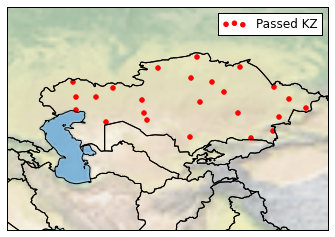

In [6]:
passed_names['country'] = passed_names['STATION_NAME'].apply(lambda x: x[-2:])

passed_KZ = passed_names[passed_names['country']=='KZ']

ghcn_xy = ghcn[['STATION_NAME','LONGITUDE','LATITUDE']].drop_duplicates()

xy_KZ = pd.merge(passed_KZ,ghcn_xy,on='STATION_NAME',how='left')

lat_KZ = np.array(xy_KZ['LATITUDE'])
lon_KZ = np.array(xy_KZ['LONGITUDE'])


%matplotlib inline
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
ax = plt.axes(projection=ccrs.PlateCarree())
ax.stock_img()
ax.set_extent([42,88,30,60])

countries = cfeature.NaturalEarthFeature(\
                                        category='cultural',\
                                        name='admin_0_countries',\
                                        scale='50m',\
                                        facecolor='none')
ax.add_feature(countries)
#dots = plt.scatter(lon, lat, color='blue',transform=ccrs.Geodetic(),label='station')
dots2 = plt.scatter(lon_KZ,lat_KZ, color='red',transform=ccrs.Geodetic(),label='Passed KZ')

ax.legend()
plt.show()